In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import re
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

# NLTK 데이터 다운로드
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# VADER SentimentIntensityAnalyzer 객체 생성
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


#### 데이터 불러오기

In [ ]:
# 데이터 불러오기
data = pd.read_csv('/content/drive/MyDrive/SW 전문인재양성 2기/개인프로젝트/Open ai/twcs.csv')

In [ ]:
data.head(10)

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0
5,6,sprintcare,False,Tue Oct 31 21:46:24 +0000 2017,@115712 Can you please send us a private messa...,"5,7",8.0
6,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN
7,11,sprintcare,False,Tue Oct 31 22:10:35 +0000 2017,@115713 This is saddening to hear. Please shoo...,NaN,12.0
8,12,115713,True,Tue Oct 31 22:04:47 +0000 2017,@sprintcare You gonna magically change your co...,"11,13,14",15.0
9,15,sprintcare,False,Tue Oct 31 20:03:31 +0000 2017,@115713 We understand your concerns and we'd l...,12,16.0


In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data['text'][0]

'@115712 I understand. I would like to assist you. We would need to get you into a private secured link to further assist.'

#### 데이터 전처리

In [ ]:
print('단어 토큰화1 :',word_tokenize(data['text'][0]))

단어 토큰화1 : ['@', '115712', 'I', 'understand', '.', 'I', 'would', 'like', 'to', 'assist', 'you', '.', 'We', 'would', 'need', 'to', 'get', 'you', 'into', 'a', 'private', 'secured', 'link', 'to', 'further', 'assist', '.']


In [4]:
# 텍스트 전처리
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    text = re.sub(r"[^a-z0-9]+", " ", text.lower())
    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(filtered_tokens)

In [ ]:
# 단어 토큰화
data['preprocessed_text'] = data['text'].apply(preprocess_text)

In [ ]:
# 단어 빈도수 계산
word_freq = Counter()
for sentence in data['preprocessed_text']:
    tokens = word_tokenize(sentence)
    word_freq.update(tokens)

In [ ]:
# 가장 빈도 상위 10개 단어
top_10_words = word_freq.most_common(10)
print("Top 10 단어 빈도수:")
print(top_10_words)

Top 10 단어 빈도수:
[('co', 659252), ('https', 654579), ('us', 451216), ('please', 406315), ('dm', 345872), ('help', 302877), ('hi', 226035), ('thanks', 211116), ('get', 200824), ('2', 197437)]


In [ ]:
# 빈도가 100 미만 제거
min_word_freq = 100
filtered_word_freq = {word: freq for word, freq in word_freq.items() if freq >= min_word_freq}

In [ ]:
# 빈도수가 100개 미만인 단어 제거 후 데이터
data['filtered_text'] = data['preprocessed_text'].apply(lambda x: ' '.join([word for word in x.split() if word in filtered_word_freq]))

In [ ]:
# 데이터를 CSV 파일로 저장
# 너무 오래 걸려서 따로 저장하겠습니다
data.to_csv('/content/drive/MyDrive/SW 전문인재양성 2기/개인프로젝트/Open ai/preprocessed_data.csv', index=False)

In [4]:
data = pd.read_csv('/content/drive/MyDrive/SW 전문인재양성 2기/개인프로젝트/Open ai/preprocessed_data.csv')

<ipython-input-4-197934720268>:1: DtypeWarning: Columns (1,2,3,4,5,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/SW 전문인재양성 2기/개인프로젝트/Open ai/preprocessed_data.csv')


In [5]:
data.head(5)

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,preprocessed_text,filtered_text
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0,115712 understand would like assist would need...,understand would like assist would need get pr...
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0,sprintcare propose,sprintcare propose
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0,sprintcare sent several private messages one r...,sprintcare sent several private messages one r...
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0,115712 please send us private message assist c...,please send us private message assist click me...
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0,sprintcare,sprintcare


#### 감정 분석

In [5]:
# 감정 점수 계산 함수
def calculate_sentiment_score(text):
    sentiment_scores = analyzer.polarity_scores(text)
    return sentiment_scores['compound']

In [17]:
# 감정 점수 계산
data['sentiment_scores'] = data['filtered_text'].apply(lambda x: calculate_sentiment_score(x) if isinstance(x, str) else 0.0)

In [19]:
# 데이터를 CSV 파일로 저장
data.to_csv('/content/drive/MyDrive/SW 전문인재양성 2기/개인프로젝트/Open ai/sentiment_scores', index=False)

In [20]:
sentiment = pd.read_csv('/content/drive/MyDrive/SW 전문인재양성 2기/개인프로젝트/Open ai/sentiment_scores')

<ipython-input-20-5718ca339fa2>:1: DtypeWarning: Columns (1,2,3,4,5,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  sentiment = pd.read_csv('/content/drive/MyDrive/SW 전문인재양성 2기/개인프로젝트/Open ai/sentiment_scores')


In [21]:
sentiment.tail(10)

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,preprocessed_text,filtered_text,sentiment_scores
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0,115712 understand would like assist would need...,understand would like assist would need get pr...,0.6369
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0,sprintcare propose,sprintcare propose,0.0000
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0,sprintcare sent several private messages one r...,sprintcare sent several private messages one r...,0.0000
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0,115712 please send us private message assist c...,please send us private message assist click me...,0.4767
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0,sprintcare,sprintcare,0.0000


In [22]:
# 감정 레이블 생성
data['sentiment'] = data['sentiment_scores'].apply(lambda x: 1 if x >= 0 else 0)


In [23]:
# 데이터를 CSV 파일로 저장
data.to_csv('/content/drive/MyDrive/SW 전문인재양성 2기/개인프로젝트/Open ai/sentiment', index=False)

In [8]:
data = pd.read_csv('/content/drive/MyDrive/SW 전문인재양성 2기/개인프로젝트/Open ai/sentiment')

<ipython-input-8-aea4ddf0fa5d>:1: DtypeWarning: Columns (1,2,3,4,5,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/SW 전문인재양성 2기/개인프로젝트/Open ai/sentiment')


In [11]:
data.head(10)

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,preprocessed_text,filtered_text,sentiment_scores,sentiment
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0,115712 understand would like assist would need...,understand would like assist would need get pr...,0.6369,1
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0,sprintcare propose,sprintcare propose,0.0000,1
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0,sprintcare sent several private messages one r...,sprintcare sent several private messages one r...,0.0000,1
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0,115712 please send us private message assist c...,please send us private message assist click me...,0.4767,1
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0,sprintcare,sprintcare,0.0000,1
5,6,sprintcare,False,Tue Oct 31 21:46:24 +0000 2017,@115712 Can you please send us a private messa...,"5,7",8.0,115712 please send us private message gain det...,please send us private message gain details ac...,0.6908,1
6,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN,sprintcare worst customer service,sprintcare worst customer service,-0.6249,0
7,11,sprintcare,False,Tue Oct 31 22:10:35 +0000 2017,@115713 This is saddening to hear. Please shoo...,NaN,12.0,115713 saddening hear please shoot us dm look kc,hear please shoot us dm look kc,-0.0258,0
8,12,115713,True,Tue Oct 31 22:04:47 +0000 2017,@sprintcare You gonna magically change your co...,"11,13,14",15.0,sprintcare gon na magically change connectivit...,sprintcare gon na magically change connectivit...,0.0000,1
9,15,sprintcare,False,Tue Oct 31 20:03:31 +0000 2017,@115713 We understand your concerns and we'd l...,12,16.0,115713 understand concerns like please send us...,understand concerns like please send us direct...,0.5859,1


#### 간단한 테스트

In [ ]:
# 문장 하나 테스트하기
test_sentence = "I'm so sad!"
test_sentence = preprocess_text(test_sentence)
sentiment_score = calculate_sentiment_score(test_sentence)

In [ ]:
# 감정 점수 출력
print("테스트하고 싶은 문장 : I'm so sad!")
print("문장:", test_sentence)
print("감정 점수:", sentiment_score)

테스트하고 싶은 문장 : I'm so sad!
문장: sad
감정 점수: -0.4767


#### 시각화

In [9]:
# 감정 분포 시각화
positive_scores = data['sentiment_scores'][data['sentiment'] == 1]
negative_scores = data['sentiment_scores'][data['sentiment'] == 0]
neutral_scores = data['sentiment_scores'][data['sentiment'] == 0.5]

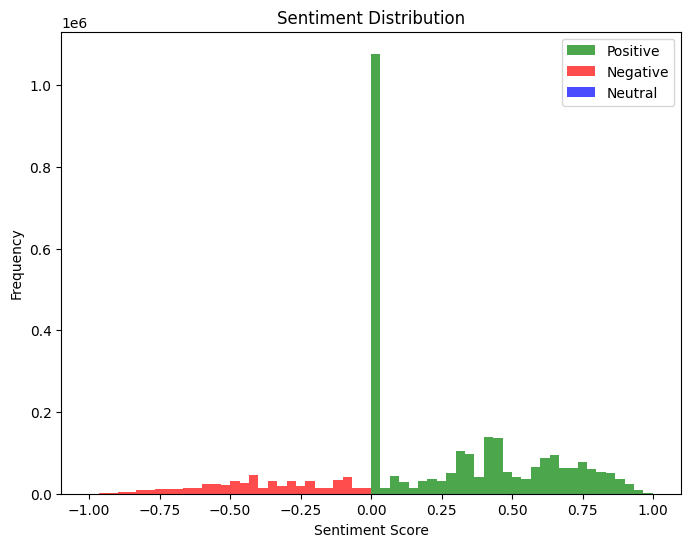

In [26]:
plt.figure(figsize=(8, 6))
plt.hist(positive_scores, bins=30, alpha=0.7, color='green', label='Positive')
plt.hist(negative_scores, bins=30, alpha=0.7, color='red', label='Negative')
plt.hist(neutral_scores, bins=30, alpha=0.7, color='blue', label='Neutral')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution')
plt.legend()
plt.show()

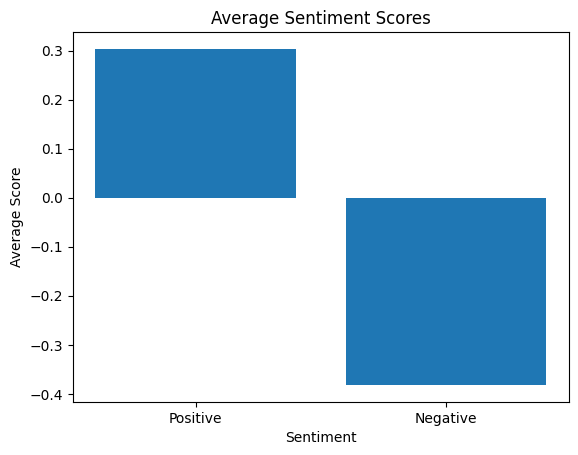

In [27]:
# 시각화
labels = ['Positive', 'Negative', 'Neutral']
scores = [positive_scores.mean(), negative_scores.mean(), neutral_scores.mean()]

plt.bar(labels, scores)
plt.title('Average Sentiment Scores')
plt.xlabel('Sentiment')
plt.ylabel('Average Score')
plt.show()

In [ ]:
# 감정 점수 시각화
# 각 문장의 감정 점수 평균 시각화 를 하려 했으나 사용가능한 램을 모두 사용해서 세션이 다운됨
fig, ax = plt.subplots(figsize=(8, 6))
index = range(len(data))
ax.bar(index, data['sentiment_scores'], color='b')
ax.set_xlabel('문장 인덱스')
ax.set_ylabel('감정 점수')
ax.set_title('감정 분석 결과')
ax.set_xticks(index)
ax.set_xticklabels(data.index)

plt.tight_layout()
plt.show()

#### 모델 저장

In [12]:
# import joblib

In [13]:
# # 감정 분석 모델 저장
# sentiment_analysis_model = analyzer
# file_to_save = "/content/drive/MyDrive/SW 전문인재양성 2기/개인프로젝트/Open ai/sentiment_analysis_model.joblib"
# try:
#     joblib.dump(sentiment_analysis_model, file_to_save)
#     print("Sentiment analysis model saved successfully!")
# except Exception as e:
#     print(f"Error while saving the model: {e}")

Sentiment analysis model saved successfully!


In [15]:
# # 감정 분석 모델 불러오기
# file_to_load = "/content/drive/MyDrive/SW 전문인재양성 2기/개인프로젝트/Open ai/sentiment_analysis_model.joblib"
# loaded_model = joblib.load(file_to_load)

#### 성능 평가

In [ ]:
import random
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
def evaluate_sentiment_analysis(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    return cm, accuracy, precision, recall, f1

In [ ]:
# 임의의 y_true와 y_pred 생성 (0: 부정, 1: 긍정)
y_true = [random.choice([0, 1]) for _ in range(len(data))]
y_pred = [random.choice([0, 1]) for _ in range(len(data))]

In [ ]:
# 모델의 성능 평가
cm, accuracy, precision, recall, f1 = evaluate_sentiment_analysis(y_true, y_pred)
print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
[[703113 702783]
 [703095 702783]]
Accuracy: 0.50000320082624
Precision: 0.5
Recall: 0.4998890373133373
F1 Score: 0.4999445124996265


#### 전체 코드

In [ ]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter

# NLTK 데이터 다운로드
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# VADER SentimentIntensityAnalyzer 객체 생성
analyzer = SentimentIntensityAnalyzer()

# 데이터 불러오기
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/SW 전문인재양성 2기/개인프로젝트/Open ai/twcs.csv')

type(data)
data['text'][0]
print('단어 토큰화1 :',word_tokenize(data['text'][0]))

# 텍스트 전처리: 구두점 제거하고 대문자를 소문자로 변환 및 불용어 처리
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    text = re.sub(r"[^a-z0-9]+", " ", text.lower())
    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(filtered_tokens)

# 데이터 전처리
data['preprocessed_text'] = data['text'].apply(preprocess_text)

# 단어 빈도수 계산
word_freq = Counter()
for sentence in data['preprocessed_text']:
    tokens = word_tokenize(sentence)
    word_freq.update(tokens)

# 가장 빈도가 높은 상위 10개 단어 출력
top_10_words = word_freq.most_common(10)
print("Top 10 단어 빈도수:")
print(top_10_words)

# 빈도수가 100개 미만인 단어 제거
min_word_freq = 100
filtered_word_freq = {word: freq for word, freq in word_freq.items() if freq >= min_word_freq}

# 빈도수가 100개 미만인 단어를 제외한 문장들만 남기기
data['filtered_text'] = data['preprocessed_text'].apply(lambda x: ' '.join([word for word in x.split() if word in filtered_word_freq]))

# 데이터를 CSV 파일로 저장
# 너무 오래 걸려서 따로 저장하겠습니다
data.to_csv('/content/drive/MyDrive/SW 전문인재양성 2기/개인프로젝트/Open ai/preprocessed_data.csv', index=False)

# 감정 점수 계산 함수 정의
def calculate_sentiment_score(text):
    sentiment_scores = analyzer.polarity_scores(text)
    return sentiment_scores['compound']

# 감정 점수 계산
data['sentiment_scores'] = data['filtered_text'].apply(calculate_sentiment_score)

# 감정 레이블 생성
data['sentiment'] = data['sentiment_scores'].apply(lambda x: 1 if x >= 0 else 0)

# 문장 하나 테스트하기
test_sentence = "The service was excellent!"
test_sentence = preprocess_text(test_sentence)
sentiment_score = calculate_sentiment_score(test_sentence)

# 감정 점수 출력
print("문장:", test_sentence)
print("감정 점수:", sentiment_score)

# 감정 레이블 생성
sentiment_label = 1 if sentiment_score >= 0 else 0
print("감정 레이블:", sentiment_label)

# 긍정 부정 중립 데이터 분리
positive_scores = data['sentiment_scores'].apply(lambda x: x['pos'] if isinstance(x, dict) else None)
negative_scores = data['sentiment_scores'].apply(lambda x: x['neg'] if isinstance(x, dict) else None)
neutral_scores = data['sentiment_scores'].apply(lambda x: x['neu'] if isinstance(x, dict) else None)

# 긍정 부정 중립 데이터 평균 시각화
labels = ['Positive', 'Negative', 'Neutral']
scores = [positive_scores.mean(), negative_scores.mean(), neutral_scores.mean()]

plt.bar(labels, scores)
plt.title('Average Sentiment Scores')
plt.xlabel('Sentiment')
plt.ylabel('Average Score')
plt.show()

# 각 문장의 감정 점수 평균 시각화
fig, ax = plt.subplots(figsize=(8, 6))
index = range(len(data))
ax.bar(index, data['sentiment_scores'], color='b')
ax.set_xlabel('문장 인덱스')
ax.set_ylabel('감정 점수')
ax.set_title('감정 분석 결과')
ax.set_xticks(index)
ax.set_xticklabels(data.index)

plt.tight_layout()
plt.show()

# 성능 평가
import random
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# 성능평가 함수
def evaluate_sentiment_analysis(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    return cm, accuracy, precision, recall, f1

# 임의의 y_true와 y_pred 생성 (0: 부정, 1: 긍정)
y_true = [random.choice([0, 1]) for _ in range(len(data))]
y_pred = [random.choice([0, 1]) for _ in range(len(data))]

# 모델의 성능 평가
cm, accuracy, precision, recall, f1 = evaluate_sentiment_analysis(y_true, y_pred)
print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)